<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Final Project Presentation</div>
<div style="text-align: right">Group 13 - The Levitators, 04 May 2022</div>

We started to work on MLB Dataset, but had to drop the idea because we are not familiar with the game. 

<img src="such-run-so-athleticism-much-determined-many-inspiring-wow.jpg" width=600>

---


# Song Popularity - Analysis & Prediction 

<img src="2e90c91cbe1717b8f684b2652820f49f.jpg" width=1000>

#### Motivation

We have chosen this dataset because it aligns with project requirements and is also fun to work with.
More importantly, we like to analyse what parameters makes a song more popular and possibly model it.

<img src="Screenshot (182).png" width=600>

Each one of us have a one true favorite song and one true favorite artist. There might be a numerous reasons why a specific person likes a specific song. The factors might include the genre choice, the charisma of the artist, mood or theme of the song, other personal preferences/experiences or even if it's just easy to hum while working on a boring task.


There is a deeper connection between the artists and the audience through the medium, we call singing. We start out with a premise that every hit song has some special intrinsic characteristic attributes that make them stand out.

> # Problem Statement

What makes a song, a $hit$ $song$? Or what makes a song $popular$? 

In [ ]:
> # Dataset

We have used the Spotify tracks dataset from [kaggle.](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=artists.csv)
<br/>
These records have been extracted using Spotify developer API [reference](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features). <br/>

Dataset contains ~60,000 songs and has features as follow:
- **artists**: List of names of the artists
- **release_date**: Date of release
- **song name**:  Name of the song/track
- **duration_ms**: The duration of the track in milliseconds.
- **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. 
- **instrumentalness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- **popularity**: Song ratings of spotify audience.
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- **explicit**: Explicit nature of the song

In [31]:
# importing libraries
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from scipy import stats
from scipy.stats import t, ttest_1samp, ttest_rel, ttest_ind
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"data/tracks.csv")
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [32]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_popular,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,0,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,0,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,0,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,0,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,0,1922


In [33]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_popular
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410,0.491903
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112,0.499935
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000,0.000000
50%,27.000000,2.149070e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000,0.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000,1.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

# Exploratory Data Aanalysis

In [35]:
# check for null values
df.isna().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
is_popular          0
year                0
dtype: int64

In [36]:
df = df.dropna()

In [37]:
# create a new column "is_popular" using the mean of "popularity" column
popularity_mean = df.popularity.mean()
df["is_popular"] = [ 1 if i>=popularity_mean else 0 for i in df.popularity]
df["is_popular"].value_counts()

0    298050
1    288551
Name: is_popular, dtype: int64

In [38]:
# Creating an year column from releas date
df['year'] = df.release_date.apply(lambda x: x.split('-')[0])
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'is_popular', 'year'],
      dtype='object')

In [39]:
df_clean = (df
            .sort_values(by=['year'])
            .drop_duplicates(['id'])
           )
df_clean.year = df_clean.year.astype('int')
df_clean.year.head()

478627    1900
0         1922
132320    1922
132319    1922
132318    1922
Name: year, dtype: int64

In [40]:
# filter for latest songs
df_filtered = df_clean[(df_clean['year'] > 2015) & (df_clean['year'] < 2022)]
df_filtered = df_filtered.drop_duplicates(subset=['name', 'artists'])
df_filtered

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_popular,year
530484,4BOYIpYF7zTYtAkpjoD687,Tere Sang Yaara,65,286380,0,['Atif Aslam'],['2oSONSC9zQ4UonDKnLqksx'],2016-07-15,0.539,0.551,...,1,0.0361,0.6510,0.000000,0.1240,0.556,75.899,4,1,2016
530501,1XIdLjLOIYCGtobNIXMwYS,Girl I Need You,58,297752,0,"['Meet Bros.', 'Roach Killa', 'Khushboo Grewal...","['0qpsFfOT3SmdGmnyV6rOhS', '62RUJAVFb2U8n54mYn...",2016-04-09,0.647,0.537,...,1,0.0258,0.3680,0.000000,0.2130,0.185,131.927,4,1,2016
530485,1UWacd8x8tPPwmrPB1MoBI,Ae Dil Hai Mushkil Title Track,63,269032,0,"['Pritam', 'Arijit Singh']","['1wRPtKGflJrBx9BmLsSwlU', '4YRxDV8wJFPHPTeXep...",2016-10-26,0.495,0.654,...,0,0.0679,0.7130,0.000000,0.1650,0.350,123.896,4,1,2016
530489,0biCSADTAblvLTLtJz4pXO,Nashe Si Chadh Gayi,63,237876,0,"['Vishal-Shekhar', 'Arijit Singh', 'Jaideep Sa...","['6Mv8GjQa7LKUGCAqa9qqdb', '4YRxDV8wJFPHPTeXep...",2016-12-01,0.799,0.784,...,0,0.0519,0.1100,0.000003,0.2270,0.260,96.953,4,1,2016
500563,7l0DPehrQ3M9DOgzy7dRGH,Prokrastination,52,321403,0,['Moop Mama'],['49rpD3gtSpIjsZNxdwhuYl'],2016-04-08,0.904,0.399,...,1,0.0824,0.0744,0.607000,0.0594,0.346,119.994,4,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211936,3TXwl1FmySz0YURQVrHY8Y,Están Pa´ Mí,3,234293,0,"['Jhay Cortez', 'J Balvin']","['0EFisYRi20PTADoJrifHrz', '1vyhD5VmyZ7KMfW5gq...",2021-04-02,0.791,0.879,...,1,0.0457,0.0988,0.000000,0.0994,0.632,140.007,4,0,2021
211960,1QOMoYQmiPJsxNemXcblen,De Cero,71,187116,0,['Morat'],['5C4PDR4LnhZTbVnKWXuDKD'],2021-03-18,0.602,0.811,...,1,0.0362,0.0766,0.000000,0.2730,0.807,159.829,4,1,2021
211959,67einYP4mV6zNPBUdxqNYR,Breathe Me,0,274933,0,['Sia'],['5WUlDfRSoLAfcVSX1WnrxN'],2021-04-13,0.544,0.630,...,1,0.0335,0.0341,0.579000,0.0961,0.202,120.066,4,0,2021
211949,53MhG9wCfMQNOrkQa8eWpK,Cuando Bebe,0,253747,0,"['Jhay Cortez', 'Rafa Pabön']","['0EFisYRi20PTADoJrifHrz', '11YLRSsZA3YVuQQtHX...",2021-04-14,0.820,0.722,...,0,0.0560,0.0705,0.000000,0.0851,0.797,98.016,4,0,2021


# Features Analysis

In [ ]:
**Primary Field** : id (Song/track ID from Spotify API) <br/>

**Categorical** : <br/>
Explicit (0/1) <br/>
Key (0-11) <br/>
Mode (0 for minor, 1 for major) <br/>
Time Signature (3-7) <br/>
Release Date <br/>
Song Name <br/>
Artists <br/>

**Numerical**: <br/>
Popularity (0-100) <br/>
Duration (in ms) (~ 200k - 300k) <br/>
Danceability (0-1) <br/>
Energy (0-1) <br/>
Loudness (-60 to 0) <br/>
Speechiness (0-1) <br/>
Acousticness (0-1) <br/>
Instrumentalness (0-1) <br/>
Liveness (0-1) <br/>
Valence (0-1) <br/>
Tempo (0-250) <br/>

### Audio Features


According to Spotify API songs are given a score based on the categories such as:-
    
    -Mood: Danceability, Valence, Energy, Tempo
    -Properties: Loudness, Speechiness, Instrumentalness
    -Context: Liveness, Acousticness

In [41]:
set(df_filtered.year)

{2016, 2017, 2018, 2019, 2020, 2021}

In [42]:
df_filtered

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_popular,year
530484,4BOYIpYF7zTYtAkpjoD687,Tere Sang Yaara,65,286380,0,['Atif Aslam'],['2oSONSC9zQ4UonDKnLqksx'],2016-07-15,0.539,0.551,...,1,0.0361,0.6510,0.000000,0.1240,0.556,75.899,4,1,2016
530501,1XIdLjLOIYCGtobNIXMwYS,Girl I Need You,58,297752,0,"['Meet Bros.', 'Roach Killa', 'Khushboo Grewal...","['0qpsFfOT3SmdGmnyV6rOhS', '62RUJAVFb2U8n54mYn...",2016-04-09,0.647,0.537,...,1,0.0258,0.3680,0.000000,0.2130,0.185,131.927,4,1,2016
530485,1UWacd8x8tPPwmrPB1MoBI,Ae Dil Hai Mushkil Title Track,63,269032,0,"['Pritam', 'Arijit Singh']","['1wRPtKGflJrBx9BmLsSwlU', '4YRxDV8wJFPHPTeXep...",2016-10-26,0.495,0.654,...,0,0.0679,0.7130,0.000000,0.1650,0.350,123.896,4,1,2016
530489,0biCSADTAblvLTLtJz4pXO,Nashe Si Chadh Gayi,63,237876,0,"['Vishal-Shekhar', 'Arijit Singh', 'Jaideep Sa...","['6Mv8GjQa7LKUGCAqa9qqdb', '4YRxDV8wJFPHPTeXep...",2016-12-01,0.799,0.784,...,0,0.0519,0.1100,0.000003,0.2270,0.260,96.953,4,1,2016
500563,7l0DPehrQ3M9DOgzy7dRGH,Prokrastination,52,321403,0,['Moop Mama'],['49rpD3gtSpIjsZNxdwhuYl'],2016-04-08,0.904,0.399,...,1,0.0824,0.0744,0.607000,0.0594,0.346,119.994,4,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211936,3TXwl1FmySz0YURQVrHY8Y,Están Pa´ Mí,3,234293,0,"['Jhay Cortez', 'J Balvin']","['0EFisYRi20PTADoJrifHrz', '1vyhD5VmyZ7KMfW5gq...",2021-04-02,0.791,0.879,...,1,0.0457,0.0988,0.000000,0.0994,0.632,140.007,4,0,2021
211960,1QOMoYQmiPJsxNemXcblen,De Cero,71,187116,0,['Morat'],['5C4PDR4LnhZTbVnKWXuDKD'],2021-03-18,0.602,0.811,...,1,0.0362,0.0766,0.000000,0.2730,0.807,159.829,4,1,2021
211959,67einYP4mV6zNPBUdxqNYR,Breathe Me,0,274933,0,['Sia'],['5WUlDfRSoLAfcVSX1WnrxN'],2021-04-13,0.544,0.630,...,1,0.0335,0.0341,0.579000,0.0961,0.202,120.066,4,0,2021
211949,53MhG9wCfMQNOrkQa8eWpK,Cuando Bebe,0,253747,0,"['Jhay Cortez', 'Rafa Pabön']","['0EFisYRi20PTADoJrifHrz', '11YLRSsZA3YVuQQtHX...",2021-04-14,0.820,0.722,...,0,0.0560,0.0705,0.000000,0.0851,0.797,98.016,4,0,2021


In [43]:
# convert list of artists to string
df_filtered['artists_clean'] = [', '.join(map(str, eval(l))) for l in df_filtered['artists']]
df_filtered = df_filtered.reset_index()
print(df_filtered['artists_clean'][0])
type(df_filtered['artists_clean'][0])

Atif Aslam


str

In [29]:
df_filtered

,index,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_popular,year,artists_clean
0,530484,4BOYIpYF7zTYtAkpjoD687,Tere Sang Yaara,65,286380,0,['Atif Aslam'],['2oSONSC9zQ4UonDKnLqksx'],2016-07-15,0.539,...,0.0361,0.6510,0.000000,0.1240,0.556,75.899,4,1,2016,Atif Aslam
1,530501,1XIdLjLOIYCGtobNIXMwYS,Girl I Need You,58,297752,0,"['Meet Bros.', 'Roach Killa', 'Khushboo Grewal...","['0qpsFfOT3SmdGmnyV6rOhS', '62RUJAVFb2U8n54mYn...",2016-04-09,0.647,...,0.0258,0.3680,0.000000,0.2130,0.185,131.927,4,1,2016,"Meet Bros., Roach Killa, Khushboo Grewal, Arij..."
2,530485,1UWacd8x8tPPwmrPB1MoBI,Ae Dil Hai Mushkil Title Track,63,269032,0,"['Pritam', 'Arijit Singh']","['1wRPtKGflJrBx9BmLsSwlU', '4YRxDV8wJFPHPTeXep...",2016-10-26,0.495,...,0.0679,0.7130,0.000000,0.1650,0.350,123.896,4,1,2016,"Pritam, Arijit Singh"
3,530489,0biCSADTAblvLTLtJz4pXO,Nashe Si Chadh Gayi,63,237876,0,"['Vishal-Shekhar', 'Arijit Singh', 'Jaideep Sa...","['6Mv8GjQa7LKUGCAqa9qqdb', '4YRxDV8wJFPHPTeXep...",2016-12-01,0.799,...,0.0519,0.1100,0.000003,0.2270,0.260,96.953,4,1,2016,"Vishal-Shekhar, Arijit Singh, Jaideep Sahni"
4,500563,7l0DPehrQ3M9DOgzy7dRGH,Prokrastination,52,321403,0,['Moop Mama'],['49rpD3gtSpIjsZNxdwhuYl'],2016-04-08,0.904,...,0.0824,0.0744,0.607000,0.0594,0.346,119.994,4,1,2016,Moop Mama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58942,211936,3TXwl1FmySz0YURQVrHY8Y,Están Pa´ Mí,3,234293,0,"['Jhay Cortez', 'J Balvin']","['0EFisYRi20PTADoJrifHrz', '1vyhD5VmyZ7KMfW5gq...",2021-04-02,0.791,...,0.0457,0.0988,0.000000,0.0994,0.632,140.007,4,0,2021,"Jhay Cortez, J Balvin"
58943,211960,1QOMoYQmiPJsxNemXcblen,De Cero,71,187116,0,['Morat'],['5C4PDR4LnhZTbVnKWXuDKD'],2021-03-18,0.602,...,0.0362,0.0766,0.000000,0.2730,0.807,159.829,4,1,2021,Morat
58944,211959,67einYP4mV6zNPBUdxqNYR,Breathe Me,0,274933,0,['Sia'],['5WUlDfRSoLAfcVSX1WnrxN'],2021-04-13,0.544,...,0.0335,0.0341,0.579000,0.0961,0.202,120.066,4,0,2021,Sia
58945,211949,53MhG9wCfMQNOrkQa8eWpK,Cuando Bebe,0,253747,0,"['Jhay Cortez', 'Rafa Pabön']","['0EFisYRi20PTADoJrifHrz', '11YLRSsZA3YVuQQtHX...",2021-04-14,0.820,...,0.0560,0.0705,0.000000,0.0851,0.797,98.016,4,0,2021,"Jhay Cortez, Rafa Pabön"


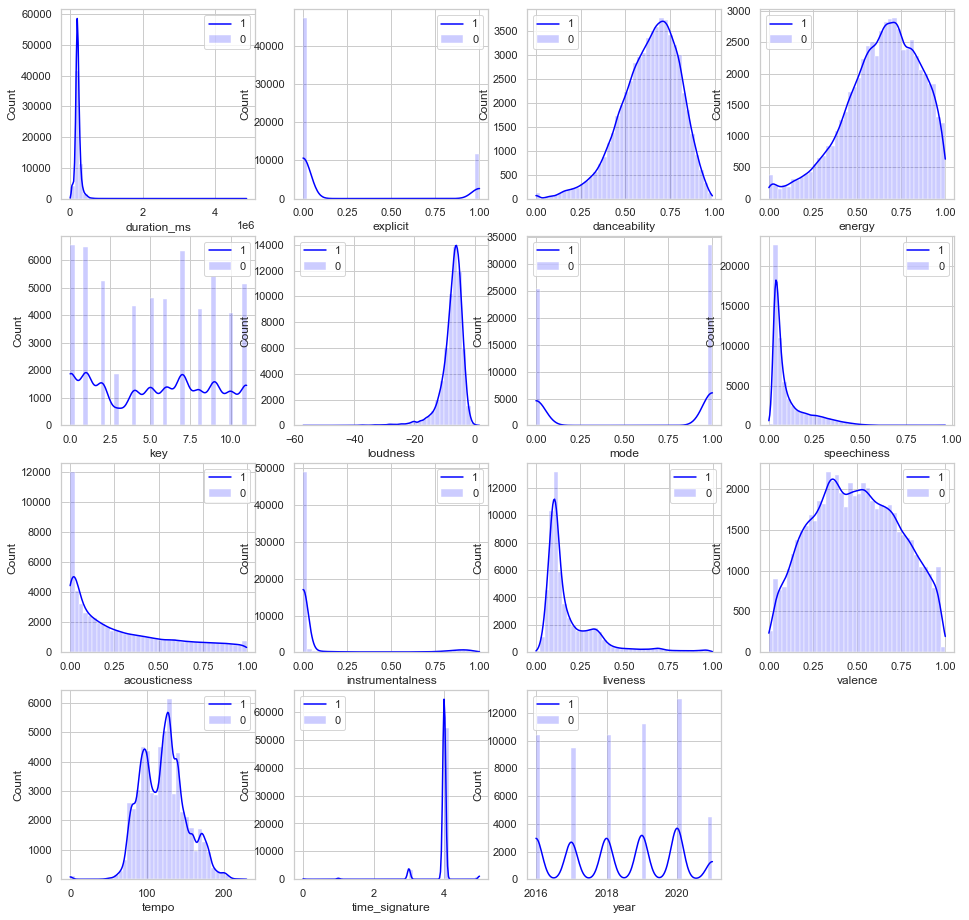

In [44]:
columns_to_plot = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',\
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'year']

plt.figure(figsize=(16,16))
for i, col  in enumerate(columns_to_plot):
    plt.subplot(4,4, i+1)
    sns.histplot(df_filtered[col], color='blue', alpha=0.2, kde=True, bins=40)
    plt.legend((1,0))

### Popularity vs Features
scatterplot

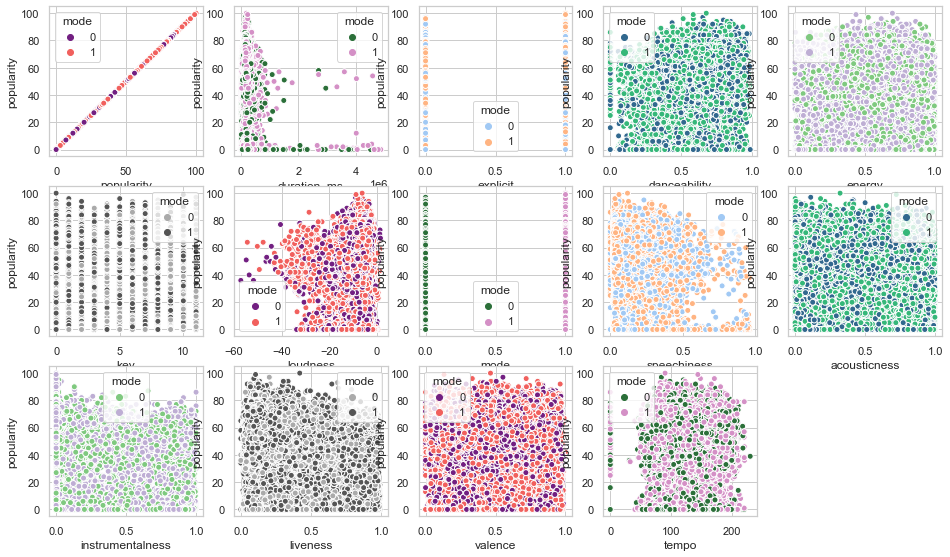

In [45]:
data=df_filtered.copy()
columns_to_plot = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']#'is_popular'

palettes = ["magma", "cubehelix", "pastel", "viridis","Accent", "binary"]

plt.figure(figsize=(16,16))
for i, col  in enumerate(columns_to_plot):
    plt.subplot(5,5, i+1)
    sns.scatterplot(x=col, y="popularity",
                hue="mode", 
                palette=palettes[i%len(palettes)],
                sizes=(1, 8), linewidth=1,
                data=data)

**Inference**
<br/>
Most of the features here doesn't have a linear correlation with popularity

## Basic Analysis

#### Top 10 artists of year 2021

In [48]:
data_2021 = data.loc[data['year'] == 2021]
plt.figure(figsize=(80, 25))
sns.set(style="whitegrid")

# group by the song's name and rank them base on their popularity
x = data_2021.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(30)
x

artists
['Olivia Rodrigo']                                                                            94.5
['Los Legendarios', 'Wisin', 'Jhay Cortez']                                                   94.0
['Riton', 'Nightcrawlers', 'Mufasa & Hypeman', 'Dopamine']                                    94.0
['Travis Scott', 'HVME']                                                                      92.0
['Nathan Evans', '220 KID', 'Billen Ted']                                                     92.0
['Rochy RD', 'Myke Towers', 'Nicki Nicole']                                                   92.0
['ATB', 'Topic', 'A7S']                                                                       91.0
['Maroon 5', 'Megan Thee Stallion']                                                           90.0
['Saweetie', 'Doja Cat']                                                                      90.0
['Drake', 'Lil Baby']                                                                         89.0
['

<Figure size 5760x1800 with 0 Axes>

#### Top 20 songs in 2021

In [49]:
data_2021 = data.loc[data['year'] == 2021]
plt.figure(figsize=(80, 25))
sns.set(style="whitegrid")

# group by the song's name and rank them base on their popularity
x = data_2021.groupby("name")["popularity"].mean().sort_values(ascending=False).head(20)
x

name
Peaches (feat. Daniel Caesar & Giveon)                 100.0
drivers license                                         99.0
Leave The Door Open                                     96.0
Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit      94.0
Fiel                                                    94.0
Ella No Es Tuya - Remix                                 92.0
Up                                                      92.0
Hold On                                                 92.0
Goosebumps - Remix                                      92.0
Wellerman - Sea Shanty / 220 KID x Billen Ted Remix     92.0
911                                                     91.0
What’s Next                                             91.0
Your Love (9PM)                                         91.0
We're Good                                              91.0
Best Friend (feat. Doja Cat)                            90.0
Baila Conmigo (with Rauw Alejandro)                     90.0
Beautiful Mistakes 

<Figure size 5760x1800 with 0 Axes>

# Correlation

In [50]:
df_songs = df_filtered.copy()
df_songs.corr(method='pearson')

,index,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_popular,year
index,1.000000,0.196300,-0.037382,0.035063,0.071252,-0.009567,0.000288,0.071653,-0.017351,0.042705,0.057256,-0.175815,-0.049813,0.042651,-0.013132,0.021787,0.325424,-0.036051
popularity,0.196300,1.000000,-0.105485,0.195120,0.220582,-0.121018,-0.003442,0.150518,-0.012601,0.064616,0.119736,-0.405011,-0.154542,0.105812,-0.032304,0.016182,0.855864,0.072694
duration_ms,-0.037382,-0.105485,1.000000,-0.061947,-0.093526,0.031864,0.012249,0.032791,0.017914,-0.089341,-0.029993,0.037682,0.009664,-0.092675,0.018302,0.017000,-0.091951,-0.095968
explicit,0.035063,0.195120,-0.061947,1.000000,0.259396,0.008257,-0.002983,0.050143,-0.069287,0.378677,-0.061399,-0.158117,-0.044229,0.004030,-0.000908,0.049071,0.156474,0.105044
danceability,0.071252,0.220582,-0.093526,0.259396,1.000000,0.090686,0.014883,0.235944,-0.081526,0.215775,-0.158402,-0.207268,-0.188481,0.411061,-0.056962,0.203233,0.219983,0.106852
energy,-0.009567,-0.121018,0.031864,0.008257,0.090686,1.000000,0.036153,0.682644,-0.082640,0.039714,-0.638006,-0.054209,0.198194,0.301528,0.180835,0.159026,-0.129062,-0.068177
key,0.000288,-0.003442,0.012249,-0.002983,0.014883,0.036153,1.000000,0.023669,-0.148562,0.023252,-0.010652,-0.008267,0.000615,0.034272,0.007568,0.011014,-0.003398,-0.012894
loudness,0.071653,0.150518,0.032791,0.050143,0.235944,0.682644,0.023669,1.000000,-0.040378,-0.004166,-0.446635,-0.412442,0.048931,0.309822,0.156937,0.185946,0.123957,-0.071126
mode,-0.017351,-0.012601,0.017914,-0.069287,-0.081526,-0.082640,-0.148562,-0.040378,1.000000,-0.077452,0.065628,-0.001850,0.008409,-0.030532,0.005885,-0.028397,-0.023262,-0.030753
speechiness,0.042705,0.064616,-0.089341,0.378677,0.215775,0.039714,0.023252,-0.004166,-0.077452,1.000000,-0.024751,-0.122315,0.038024,0.072855,0.038223,0.039836,0.067307,0.082436


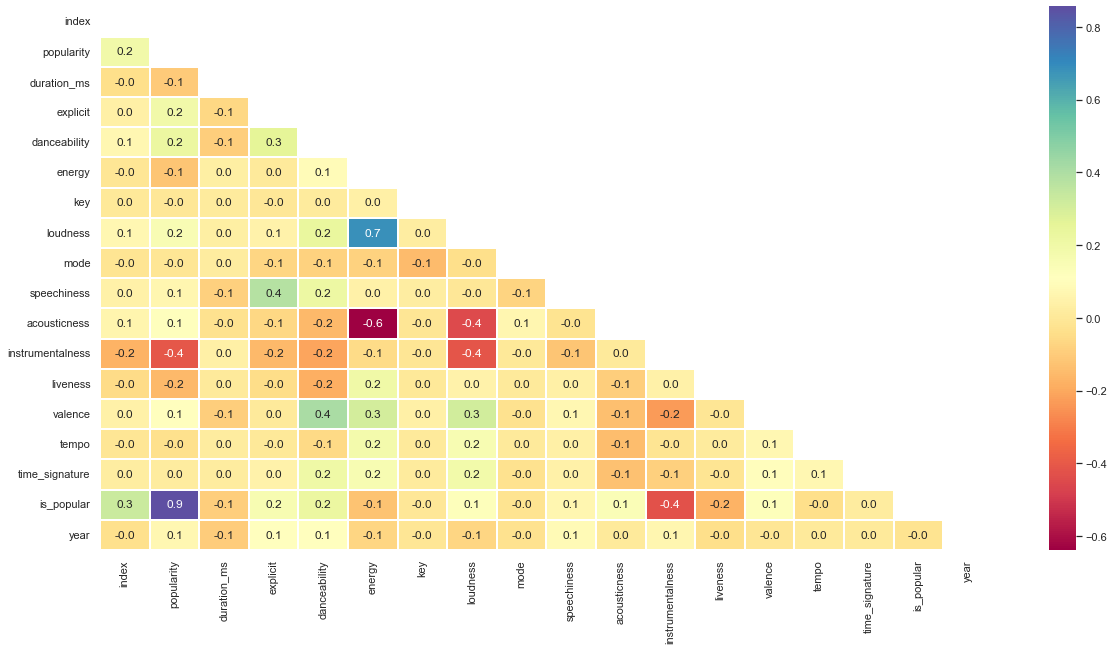

In [51]:
f,ax = plt.subplots(figsize=(20, 10))
mask = np.zeros_like(df_filtered.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_songs.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Spectral",mask=mask)
plt.show() 

### Danceability v/s Valence

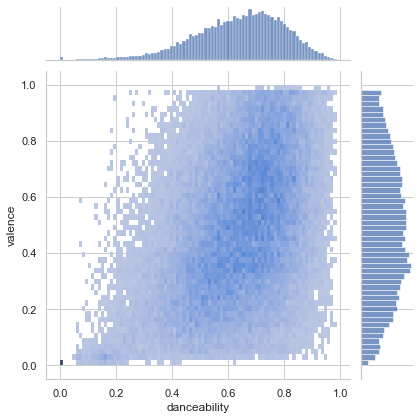

In [52]:
sns.jointplot(x='danceability',y='valence',data=data,kind='hist')
plt.show()

#### Observations
- Danceability and valence are related to each other. As valence determine the positivity of the music, the correlation between valence and danceablility is 0.39.

- Thus this states that with the increase in valence value the danceability of the music increases.

### Liveness and Loudness are independent of each other

<Figure size 720x432 with 0 Axes>

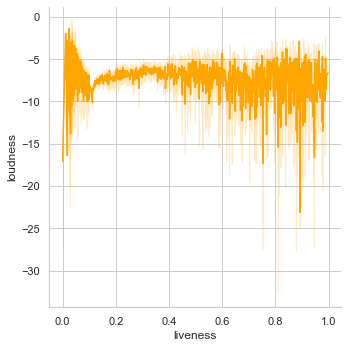

In [53]:
fig = plt.figure(figsize = (10,6))
sns.relplot(x="liveness", y="loudness", color="orange", kind="line", data=data)

**Observations**
- From the above heatmap we can see that the two factors of loudness and liveness are independent of each other. According to the co-relation matrix the value for liveness and loudness is 0.07 which is almost close to 0. This shows the weak dependancy between the two factors.

i. At very close points near and at 0 itself, a large variation is seen in Loudness. Thus this establishes no certain relation

ii. 0.2 value of Liveness onwards, the Loudness remains constant at higher value wrt Liveness. Thus no established relation between the two data points.

### Danceability vs Energy

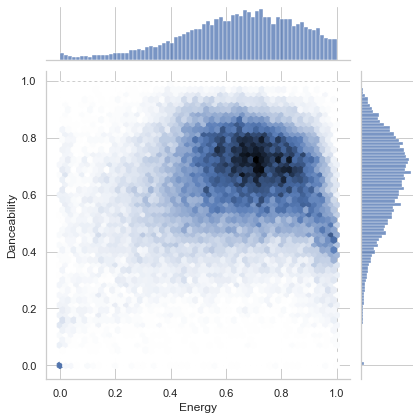

In [54]:
sns.jointplot(x='energy',y='danceability',data=data[['energy','danceability']]
             ,kind="hex").set_axis_labels("Energy","Danceability")

**Observations**
- Energy and danceability are highly correlated. Most numbers of songs have energy between 0.6–0.8 index while most songs are at the danceability of 0.6-0.8.

# Hypothesis Testing

In [55]:
#Hypothesis Testing function - comaprision between any two given features
significance_level = 0.05
def hypothesisFunc(feature1, feature2):
    df_h1 = data[[feature1,feature2]]
    md_h1 = df_h1[feature2].median()
    low_pop = df_h1[df_h1[feature2] <= md_h1]
    high_pop = df_h1[df_h1[feature2] > md_h1]
    ax = sns.kdeplot(low_pop[feature1], shade=True, label = "Low "+str(feature2))
    sns.kdeplot(high_pop[feature1],  ax=ax, shade=True, label = "High "+str(feature2))
    plt.legend()
    plt.show()
    low_list =[]
    high_list=[]
    for i in range (0,100):
        low_list.append(low_pop.sample(100)[feature1].mean())
    for k in range (0,100):
        high_list.append(high_pop.sample(100)[feature1].mean())
    t, p_value = stats.ttest_ind(a=low_list, b=high_list, equal_var=False) #t-testing
    return t,p_value;

def checkHypo(t,p_value):
    print("Test statistic: ",format(t,".2E"))
    print("P value: ",format(p_value,".2E"))
    if p_value < significance_level:
        print("Null hypothesis rejected")
    else:
        print("Null hypothesis accepted")

### H0: "Energy" is not correlated with "Liveness" of songs

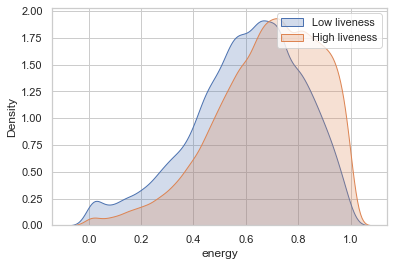

Test statistic:  -2.95E+01
P value:  5.53E-72
Null hypothesis rejected


In [56]:
t_val, p_val = hypothesisFunc("energy", "liveness")
checkHypo(t_val,p_val)

### H1 : "Energy" is not correlated with "Danceability" of songs

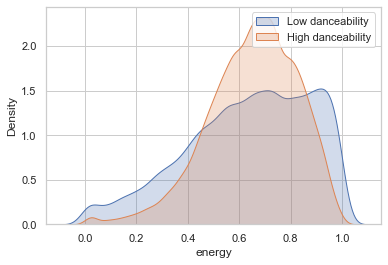

Test statistic:  -4.79E+00
P value:  3.41E-06
Null hypothesis rejected


In [57]:
t_val, p_val = hypothesisFunc("energy", "danceability")
checkHypo(t_val,p_val)

### H3 : "Key" is not correlated with "Popularity" of songs

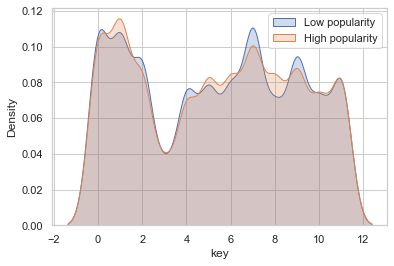

Test statistic:  -3.16E-01
P value:  7.52E-01
Null hypothesis accepted


In [59]:
#Null hyp : Energy has no effect on popularity of songs
t_val, p_val = hypothesisFunc("key", "popularity")
checkHypo(t_val,p_val)

1. There is a strong correlation between Loudness & Energy: 0.7
2. Acousticness and Energy are also moderately negatively correlated with a value of: -0.6
3. Explicit and Speechiness has a correlation value of 0.4
4. Loudness has a negative correlation with acousticness & instrumentalness with a value of: -0.4
5. Popularity has no strong correlation overall with most values being 0.1-0.2, but has a moderate correlation with instrumentalness with a value of -0.4 

### Outliers Detection

In [60]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filter
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [61]:
df_songs.columns

Index(['index', 'id', 'name', 'popularity', 'duration_ms', 'explicit',
       'artists', 'id_artists', 'release_date', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'is_popular', 'year', 'artists_clean'],
      dtype='object')

In [62]:
df_songs.loc[detect_outliers(df_songs,["mode", "is_popular","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","valence"])]

,index,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_popular,year,artists_clean
54,500584,7FivLB6yl6nQzA0qtfM28W,Seven Years Ago - Original Mix,1,401317,0,['Maax 52'],['3rdXzkZXrH35L4Gz22fzBQ'],2016-04-14,0.703,...,0.0406,0.000507,0.861,0.0551,0.462,120.007,4,0,2016,Maax 52
68,187776,6zw6FQlBbAyzj6tElkpY0S,Away - J Paul Getto Remix,1,440976,0,"['Chez Moon', 'J Paul Getto']","['5R05P7w3kjhDsQBNMEGF7f', '2qplg23iVeAdhFhv7K...",2016-12-23,0.883,...,0.0414,0.000607,0.839,0.0371,0.547,123.005,4,0,2016,"Chez Moon, J Paul Getto"
183,118378,6uI5kyORCbqPEAYdBfCrU9,Somethin' Wit' Jazz - Reelsoul 2016 Instrumental,4,397440,1,['Mr. V'],['659qXyHaiMTKxFjBMMDpo8'],2016-07-12,0.755,...,0.0529,0.000045,0.842,0.1270,0.567,125.017,4,0,2016,Mr. V
225,437980,0txjJfIrTrCB3e3KX3IMn5,Long Years,0,399328,0,['Alfred Diaz'],['224S05cWsSQvXfSkPYs81p'],2016-03-21,0.811,...,0.0637,0.003630,0.937,0.3540,0.364,118.996,4,0,2016,Alfred Diaz
242,118380,66bidYYE7ir7B8ezvMR79o,Insecure,4,245441,0,"['Re-Mind', 'Amentis']","['3TDUb3qiPduMbQXp8ztZv7', '4Mtu6SsfyJ5yxKeyzp...",2016-12-03,0.488,...,0.4400,0.074700,0.000,0.5240,0.134,155.005,4,0,2016,"Re-Mind, Amentis"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57823,501297,6XgJJAPmpK6TYuYlq0cSkx,Kapitel 09: Verhexte Hexenbesen (Hexenbesenges...,38,95280,0,['Bibi Blocksberg'],['3t2iKODSDyzoDJw7AsD99u'],2021-04-09,0.713,...,0.9550,0.838000,0.000,0.6540,0.668,131.930,4,1,2021,Bibi Blocksberg
57826,501294,2MOvsO3HaEvJvKAFqZI0tc,Kapitel 06: Verhexte Hexenbesen (Hexenbesenges...,38,90174,0,['Bibi Blocksberg'],['3t2iKODSDyzoDJw7AsD99u'],2021-04-09,0.631,...,0.9580,0.776000,0.000,0.6170,0.398,83.364,4,1,2021,Bibi Blocksberg
57830,501290,7JCkyhg1cpWNUPejUNBHoo,Kapitel 02: Verhexte Hexenbesen (Hexenbesenges...,38,97234,0,['Bibi Blocksberg'],['3t2iKODSDyzoDJw7AsD99u'],2021-04-09,0.730,...,0.9590,0.678000,0.000,0.6460,0.471,84.292,3,1,2021,Bibi Blocksberg
57834,501287,4UxoyywBFuy2cI0e9Ti8mt,Kapitel 10: Ein Tag ohne Kartoffelbrei (Hexenb...,39,94122,0,['Bibi Blocksberg'],['3t2iKODSDyzoDJw7AsD99u'],2021-04-09,0.706,...,0.9390,0.630000,0.000,0.5470,0.542,132.873,3,1,2021,Bibi Blocksberg


In [63]:
# drop outliers
df_songs = df_songs.drop(detect_outliers(df_songs,["mode", "popularity","duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","valence"]),axis = 0).reset_index(drop = True)

# Feature Engineering

Handling categorical variables

In [64]:
def bar_plot(variable):
    
    var=df_songs[variable]
    var_value= var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="teal")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))


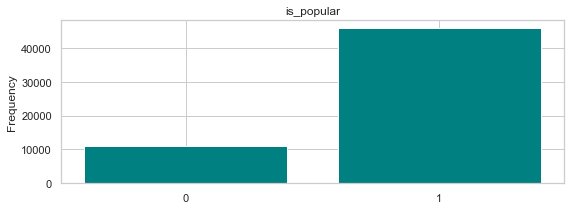

is_popular:
1    45820
0    11030
Name: is_popular, dtype: int64


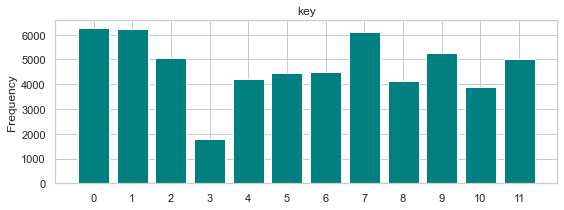

key:
0     6266
1     6224
7     6124
9     5242
2     5038
11    4995
6     4503
5     4469
4     4198
8     4115
10    3896
3     1780
Name: key, dtype: int64


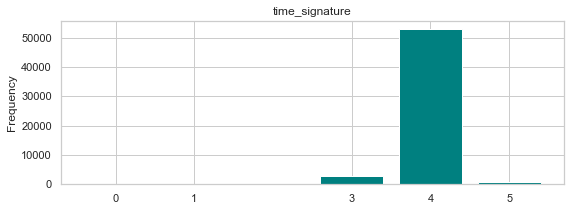

time_signature:
4    53023
3     2792
5      798
1      230
0        7
Name: time_signature, dtype: int64


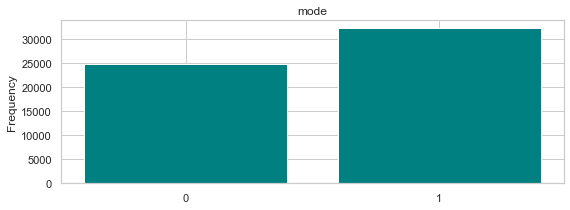

mode:
1    32198
0    24652
Name: mode, dtype: int64


In [65]:
categories = ["is_popular","key","time_signature", "mode"]
for c in categories:
    bar_plot(c)

In [66]:
df_songs["key"] = df_songs["key"].astype("category")
df_songs = pd.get_dummies(df_songs, columns=["key"])
df_songs.head()

,index,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,530484,4BOYIpYF7zTYtAkpjoD687,Tere Sang Yaara,65,286380,0,['Atif Aslam'],['2oSONSC9zQ4UonDKnLqksx'],2016-07-15,0.539,...,0,0,0,0,0,0,1,0,0,0
1,530501,1XIdLjLOIYCGtobNIXMwYS,Girl I Need You,58,297752,0,"['Meet Bros.', 'Roach Killa', 'Khushboo Grewal...","['0qpsFfOT3SmdGmnyV6rOhS', '62RUJAVFb2U8n54mYn...",2016-04-09,0.647,...,0,0,0,0,0,0,0,0,0,0
2,530485,1UWacd8x8tPPwmrPB1MoBI,Ae Dil Hai Mushkil Title Track,63,269032,0,"['Pritam', 'Arijit Singh']","['1wRPtKGflJrBx9BmLsSwlU', '4YRxDV8wJFPHPTeXep...",2016-10-26,0.495,...,0,1,0,0,0,0,0,0,0,0
3,530489,0biCSADTAblvLTLtJz4pXO,Nashe Si Chadh Gayi,63,237876,0,"['Vishal-Shekhar', 'Arijit Singh', 'Jaideep Sa...","['6Mv8GjQa7LKUGCAqa9qqdb', '4YRxDV8wJFPHPTeXep...",2016-12-01,0.799,...,0,0,1,0,0,0,0,0,0,0
4,500563,7l0DPehrQ3M9DOgzy7dRGH,Prokrastination,52,321403,0,['Moop Mama'],['49rpD3gtSpIjsZNxdwhuYl'],2016-04-08,0.904,...,0,1,0,0,0,0,0,0,0,0


In [67]:
df_songs["mode"] = df_songs["mode"].astype("category")
df_songs = pd.get_dummies(df_songs, columns=["mode"])
df_songs.head()

,index,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
0,530484,4BOYIpYF7zTYtAkpjoD687,Tere Sang Yaara,65,286380,0,['Atif Aslam'],['2oSONSC9zQ4UonDKnLqksx'],2016-07-15,0.539,...,0,0,0,0,1,0,0,0,0,1
1,530501,1XIdLjLOIYCGtobNIXMwYS,Girl I Need You,58,297752,0,"['Meet Bros.', 'Roach Killa', 'Khushboo Grewal...","['0qpsFfOT3SmdGmnyV6rOhS', '62RUJAVFb2U8n54mYn...",2016-04-09,0.647,...,0,0,0,0,0,0,0,0,0,1
2,530485,1UWacd8x8tPPwmrPB1MoBI,Ae Dil Hai Mushkil Title Track,63,269032,0,"['Pritam', 'Arijit Singh']","['1wRPtKGflJrBx9BmLsSwlU', '4YRxDV8wJFPHPTeXep...",2016-10-26,0.495,...,0,0,0,0,0,0,0,0,1,0
3,530489,0biCSADTAblvLTLtJz4pXO,Nashe Si Chadh Gayi,63,237876,0,"['Vishal-Shekhar', 'Arijit Singh', 'Jaideep Sa...","['6Mv8GjQa7LKUGCAqa9qqdb', '4YRxDV8wJFPHPTeXep...",2016-12-01,0.799,...,1,0,0,0,0,0,0,0,1,0
4,500563,7l0DPehrQ3M9DOgzy7dRGH,Prokrastination,52,321403,0,['Moop Mama'],['49rpD3gtSpIjsZNxdwhuYl'],2016-04-08,0.904,...,0,0,0,0,0,0,0,0,0,1


In [68]:
df_songs["time_signature"] = df_songs["time_signature"].astype("category")
df_songs = pd.get_dummies(df_songs, columns=["time_signature"])
df_songs.head()

,index,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,530484,4BOYIpYF7zTYtAkpjoD687,Tere Sang Yaara,65,286380,0,['Atif Aslam'],['2oSONSC9zQ4UonDKnLqksx'],2016-07-15,0.539,...,0,0,0,0,1,0,0,0,1,0
1,530501,1XIdLjLOIYCGtobNIXMwYS,Girl I Need You,58,297752,0,"['Meet Bros.', 'Roach Killa', 'Khushboo Grewal...","['0qpsFfOT3SmdGmnyV6rOhS', '62RUJAVFb2U8n54mYn...",2016-04-09,0.647,...,0,0,0,0,1,0,0,0,1,0
2,530485,1UWacd8x8tPPwmrPB1MoBI,Ae Dil Hai Mushkil Title Track,63,269032,0,"['Pritam', 'Arijit Singh']","['1wRPtKGflJrBx9BmLsSwlU', '4YRxDV8wJFPHPTeXep...",2016-10-26,0.495,...,0,0,0,1,0,0,0,0,1,0
3,530489,0biCSADTAblvLTLtJz4pXO,Nashe Si Chadh Gayi,63,237876,0,"['Vishal-Shekhar', 'Arijit Singh', 'Jaideep Sa...","['6Mv8GjQa7LKUGCAqa9qqdb', '4YRxDV8wJFPHPTeXep...",2016-12-01,0.799,...,0,0,0,1,0,0,0,0,1,0
4,500563,7l0DPehrQ3M9DOgzy7dRGH,Prokrastination,52,321403,0,['Moop Mama'],['49rpD3gtSpIjsZNxdwhuYl'],2016-04-08,0.904,...,0,0,0,0,1,0,0,0,1,0


In [69]:
df_songs["explicit"] = df_songs["explicit"].astype("category")
df_songs = pd.get_dummies(df_songs, columns=["explicit"])
df_songs.head()

,index,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,...,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,explicit_0,explicit_1
0,530484,4BOYIpYF7zTYtAkpjoD687,Tere Sang Yaara,65,286380,['Atif Aslam'],['2oSONSC9zQ4UonDKnLqksx'],2016-07-15,0.539,0.551,...,0,0,1,0,0,0,1,0,1,0
1,530501,1XIdLjLOIYCGtobNIXMwYS,Girl I Need You,58,297752,"['Meet Bros.', 'Roach Killa', 'Khushboo Grewal...","['0qpsFfOT3SmdGmnyV6rOhS', '62RUJAVFb2U8n54mYn...",2016-04-09,0.647,0.537,...,0,0,1,0,0,0,1,0,1,0
2,530485,1UWacd8x8tPPwmrPB1MoBI,Ae Dil Hai Mushkil Title Track,63,269032,"['Pritam', 'Arijit Singh']","['1wRPtKGflJrBx9BmLsSwlU', '4YRxDV8wJFPHPTeXep...",2016-10-26,0.495,0.654,...,0,1,0,0,0,0,1,0,1,0
3,530489,0biCSADTAblvLTLtJz4pXO,Nashe Si Chadh Gayi,63,237876,"['Vishal-Shekhar', 'Arijit Singh', 'Jaideep Sa...","['6Mv8GjQa7LKUGCAqa9qqdb', '4YRxDV8wJFPHPTeXep...",2016-12-01,0.799,0.784,...,0,1,0,0,0,0,1,0,1,0
4,500563,7l0DPehrQ3M9DOgzy7dRGH,Prokrastination,52,321403,['Moop Mama'],['49rpD3gtSpIjsZNxdwhuYl'],2016-04-08,0.904,0.399,...,0,0,1,0,0,0,1,0,1,0


In [74]:
# discarding columns for modelling
df_model = df_songs.loc[:, [i for i in df_songs.columns if i not in ['id', 'artists', 'name', 'popularity', 'id_artists', 'release_date', 'year', 'artists_clean']]]

In [75]:
df_model.columns.to_list()

['index',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'is_popular',
 'key_0',
 'key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11',
 'mode_0',
 'mode_1',
 'time_signature_0',
 'time_signature_1',
 'time_signature_3',
 'time_signature_4',
 'time_signature_5',
 'explicit_0',
 'explicit_1']

# Classification Models

### Train Test Split

In [76]:
# split data for train test split
y = df_model["is_popular"].values
x = df_model.drop(["is_popular"], axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (39795, 32)
x_test:  (17055, 32)
y_train:  (39795,)
y_test:  (17055,)


# KNN prediction

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df_model.loc[:, df_model.columns != 'is_popular'], df_model.loc[:,'is_popular']
y=y.astype(int)
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [1 1 1 ... 0 1 1]


### KNN Test

In [78]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) test accuracy is:  0.8452653180885371


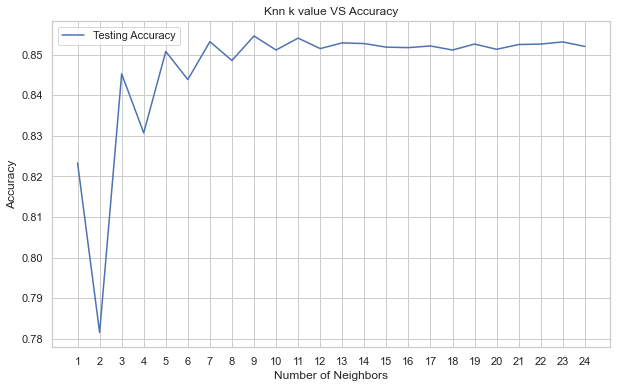

Best accuracy is 0.8545880973321607 with K = 9


In [79]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [80]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(knn,x_train,y_train,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.8540201  0.84773869 0.85050251 0.85326633 0.86030151 0.84845439
 0.84744911 0.84594119 0.85297814 0.85147022]
Cross_val scores average:  0.8512122184180516


In [81]:
KKN_Score= max(test_accuracy)
CrossVal_KKN_Score=cv_result_knn

In [82]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

Train accuracy of svm algo: 0.8239226033421284
Test accuracy of svm algo: 0.8261506889475227


# SVM

In [83]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,x_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.82386935 0.82713568 0.82160804 0.82135678 0.8258794  0.8228198
 0.82030661 0.82885147 0.82457904 0.81905001]
Cross_val scores average:  0.8235456182647342


In [84]:
SVM_score= svm.score(x_test,y_test)
CrossVal_SVM_score=cv_result_svm

# Gaussian Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
# print("Train accuracy of naive bayes:",nb.score(x_train,y_train))
print("Test accuracy of naive bayes:",nb.score(x_test,y_test))

Test accuracy of naive bayes: 0.8222222222222222


# Decision Tree Classifier

In [86]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
DecisionTree_score=dt.score(x_test,y_test)
# print("Train ccuracy of decision tree:",dt.score(x_train,y_train))
print("Test accuracy of decision tree:",dt.score(x_test,y_test))

Test accuracy of decision tree: 0.8639695104075051


In [87]:
from sklearn.model_selection import cross_val_score
k =10
cv_result = cross_val_score(dt,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.86080402 0.86432161 0.86180905 0.87060302 0.8660804  0.86780598
 0.86252827 0.86453883 0.86428751 0.85875848]
Cross_val scores average:  0.864153716559677


In [88]:
Naive_bayes_score=nb.score(x_test,y_test)

# Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 3)
rf.fit(x_train,y_train)
# print("Train ccuracy of random forest",rf.score(x_train,y_train))
print("Test accuracy of random forest",rf.score(x_test,y_test))
RandomForestClassifier_score=rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
t_true=y_test

Test accuracy of random forest 0.9068308413954852


In [90]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(rf,x_train,y_train,cv=k) # uses R^2 as score 
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.90829146 0.91256281 0.90301508 0.90879397 0.91281407 0.90751445
 0.90273938 0.9017341  0.9055039  0.89947223]
Cross_val scores average:  0.9062441448256614


In [91]:
CrossVal_RandomForestClassifier_score=cv_result_randomforest

#### Confusion Matrix with Random Forest

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[ 2040  1272]
 [  303 13440]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.62      0.72      3312
           1       0.91      0.98      0.94     13743

    accuracy                           0.91     17055
   macro avg       0.89      0.80      0.83     17055
weighted avg       0.91      0.91      0.90     17055



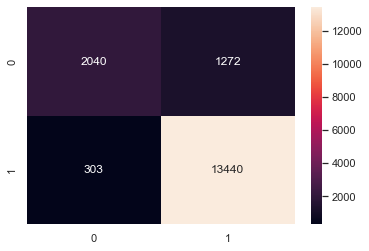

In [93]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

# Feature importance

In [97]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 6.1 MB/s eta 0:00:01


In [98]:
# plot feature importance
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#pyplot.show()

[0.10110112 0.04376474 0.03307267 0.04562515 0.0259578  0.01836241
 0.06664262 0.25084302 0.02546545 0.02426753 0.03040848 0.01445013
 0.01483905 0.01440524 0.01738805 0.00777018 0.01075372 0.01452873
 0.01262991 0.01788087 0.00870191 0.01531637 0.01150923 0.01371337
 0.         0.         0.00476815 0.01307366 0.01345874 0.00656344
 0.12273826 0.        ]


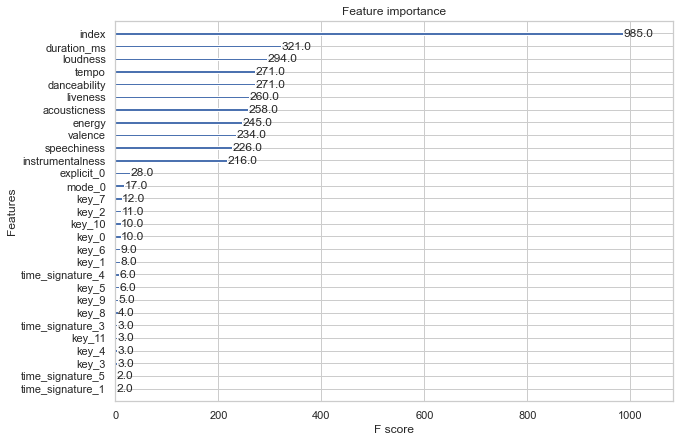

In [99]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x_train, y_train)

# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 7)
#plot_importance(model)
pyplot.show()

In [100]:
model_performances=pd.DataFrame({'Model':['RandomForestClassifier','SVM','DesicionTreeClassifier','K-NearestNeighbors','NaiveBayes'],
                                 'Accuracy':[RandomForestClassifier_score,SVM_score,DecisionTree_score,KKN_Score,Naive_bayes_score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

,Model,Accuracy
0,RandomForestClassifier,0.906831
2,DesicionTreeClassifier,0.863970
3,K-NearestNeighbors,0.854588
1,SVM,0.826151
4,NaiveBayes,0.822222


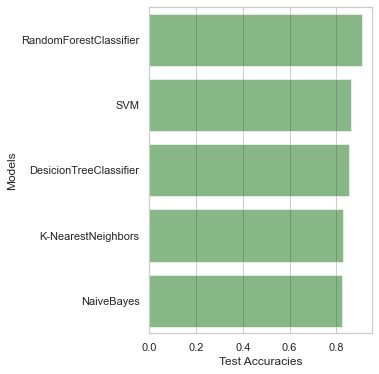

In [101]:
model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['Accuracy'].sort_values(ascending=False))
f,ax = plt.subplots(figsize = (4,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test Accuracies', ylabel='Models')
plt.show()

# Conclusion

- We have seen that dependent variable is not linearly correlated with the features
- We have engineered features before modelling 
- And we have seen that Random Forest Classifier has the best accuracy for this dataset

# <center> Thank You </center>
## <center> Team 13 </center>
 **<center> Monisha Gali </center>**
 **<center> Nirmiti Patil </center>**
 **<center> Saketh Ram Gangam </center>**

<img src="ezgif.com-gif-maker.gif" width=1000>